In [1]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7)
import warnings
warnings.filterwarnings('ignore')

#Importing Machine Learning Libraries
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#Reading the data
df = pd.read_csv('marketing-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
is_success    45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
#Checking NaN or null values
df.columns[df.isna().any()].tolist()

[]

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,is_success
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


###### No NaN or Null values in any columns

In [6]:
#Let's check the success percent
count = df.groupby('is_success').size()
percent = count / len(df)*100
print(percent)

is_success
no     88.30152
yes    11.69848
dtype: float64


##### Data is highly imbalanced with only 11 percent yes

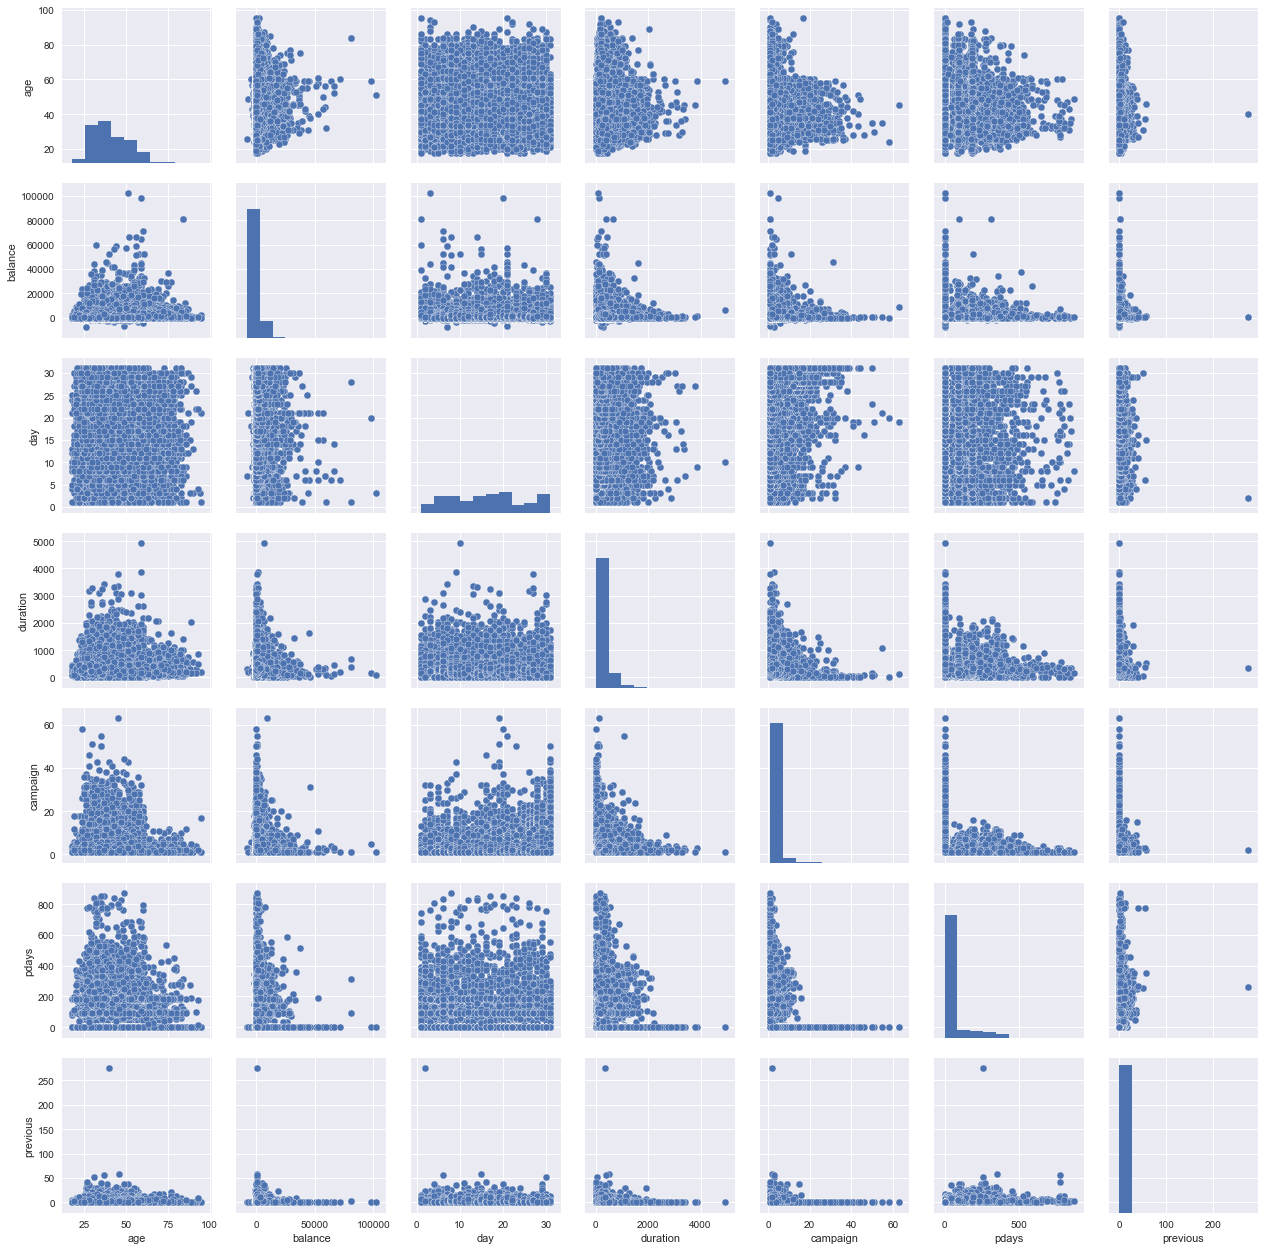

In [7]:
#checking multicollinearity
sns.pairplot(df)

#### There seems to be no multicollinearity but we can cleary see some outliers in previous and pdays. We will start analyzing each variable now

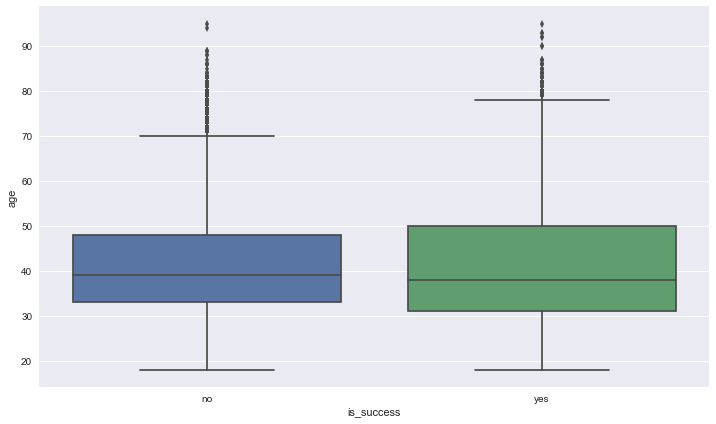

In [8]:
#Age
sns.boxplot(x='is_success', y = 'age', data=df)

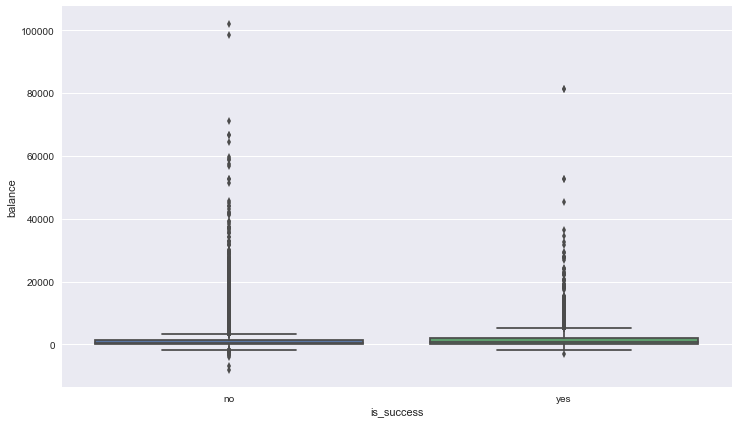

In [9]:
# Balance
sns.boxplot(x='is_success', y = 'balance', data=df)

In [10]:
# Impute outliers function
def impute_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [11]:
#Balance has lot of outliers let's fix it
df_new = df
min_val = df['balance'].min()
max_val= 20000 #as most values are under it
df_new = impute_outliers(df=df_new, column='balance', minimum=min_val, maximum=max_val)

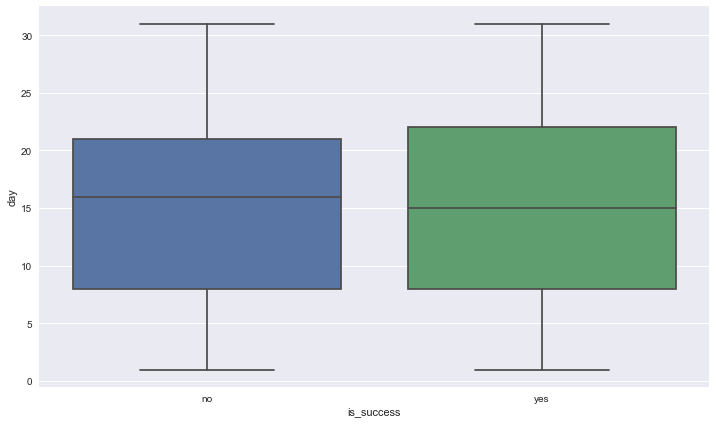

In [12]:
#day
sns.boxplot(x='is_success', y='day', data=df)

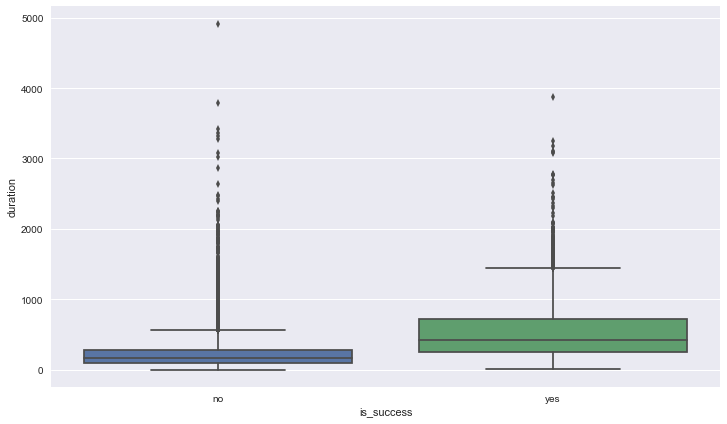

In [13]:
#duration
sns.boxplot(x='is_success', y='duration', data=df)

In [14]:
#Fixing Duration
min_val = df_new["duration"].min()
max_val = 2000
df_new = impute_outliers(df=df_new, column='duration' , minimum=min_val, maximum=max_val)

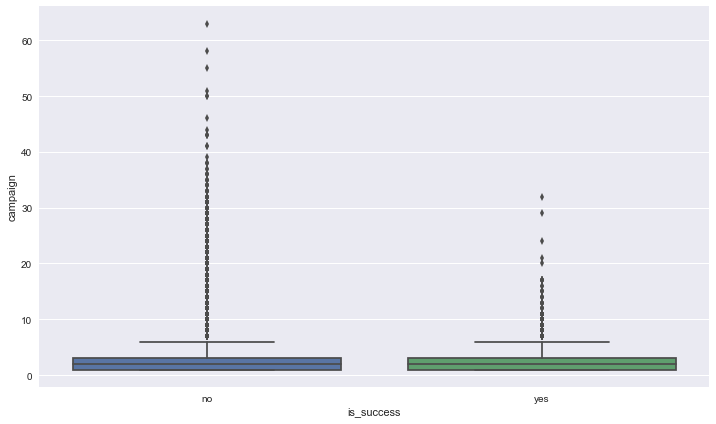

In [15]:
#Campaign
sns.boxplot(x='is_success', y='campaign', data=df)

In [16]:
#Fixing campaign column
min_val = df_new['campaign'].min()
max_val = 20
df_new = impute_outliers(df=df_new, column='campaign', minimum=min_val, maximum=max_val)

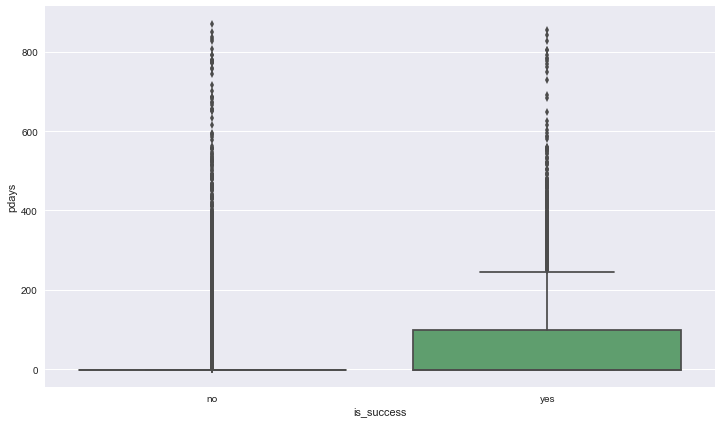

In [17]:
#pdays
sns.boxplot(x='is_success', y='pdays', data=df)

In [18]:
#Fixing pdays column
min_val = df_new['pdays'].min()
max_val = 250
df_new = impute_outliers(df=df_new, column='pdays', minimum=min_val, maximum = max_val)

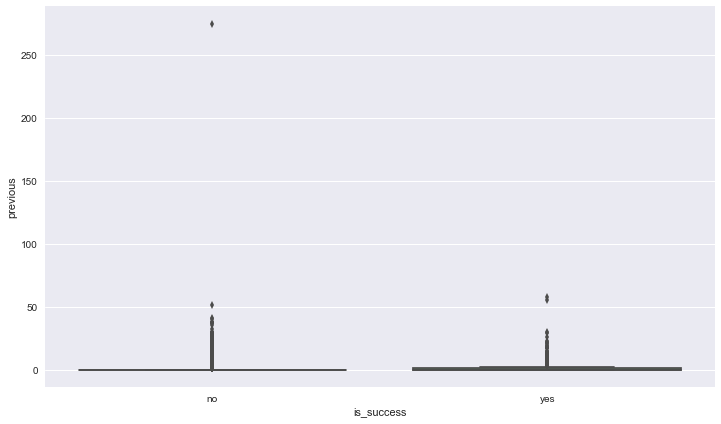

In [19]:
#previous
sns.boxplot(x='is_success', y='previous', data=df)

In [20]:
#Fixing previous
min_val = df_new['previous'].min()
max_val = 15
df_new = impute_outliers(df = df_new, column='previous', minimum=min_val, maximum=max_val)

In [21]:
df_new.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1239.089967,15.806419,255.154379,2.630474,17.370434,0.520972
std,10.618762,2213.867032,8.322476,242.792228,2.456852,47.938636,1.512395
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1397.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,19985.000000,31.000000,1994.000000,20.000000,250.000000,15.000000


#### Data seems fine now

## Categorigcal variables have unknowns in them, let's fix them too

In [22]:
#Impute unknowns function
def impute_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', df[column].mode(), col_values)
    return df

job
admin.           11.437482
blue-collar      21.525735
entrepreneur      3.289023
housemaid         2.742695
management       20.919688
retired           5.007631
self-employed     3.492513
services          9.188029
student           2.074716
technician       16.803433
unemployed        2.882042
unknown           0.637013
dtype: float64


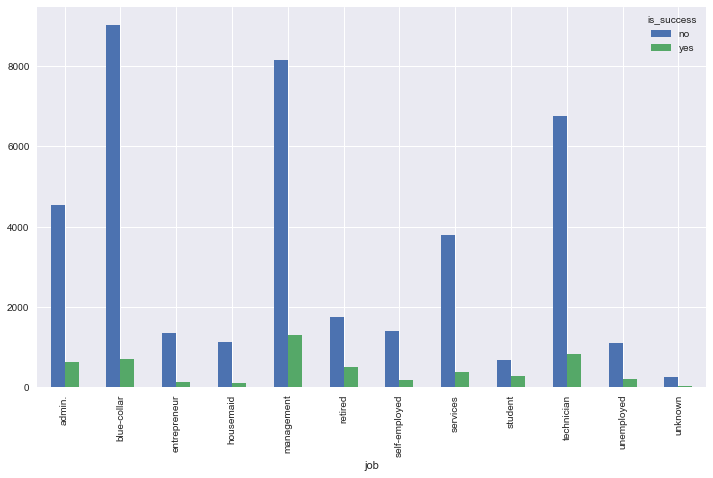

In [23]:
#job
job = pd.crosstab(df['job'], df['is_success'])
job.plot(kind='bar')
print(df.groupby(['job']).size()/len(df)*100)

In [24]:
#Fixing job
df_new = impute_unknowns(df=df_new, column='job')

marital
divorced    11.517109
married     60.193316
single      28.289576
dtype: float64


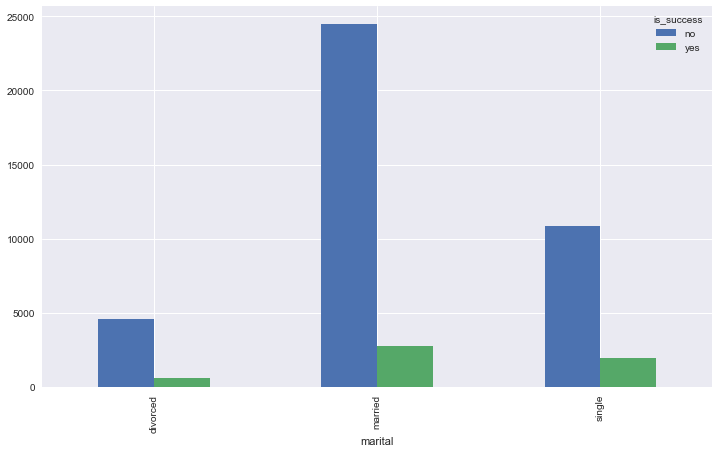

In [25]:
#marital
marital = pd.crosstab(df['marital'], df['is_success'])
marital.plot(kind='bar')
print(df.groupby(['marital']).size()/len(df)*100)

education
primary      15.153392
secondary    51.319369
tertiary     29.419831
unknown       4.107407
dtype: float64


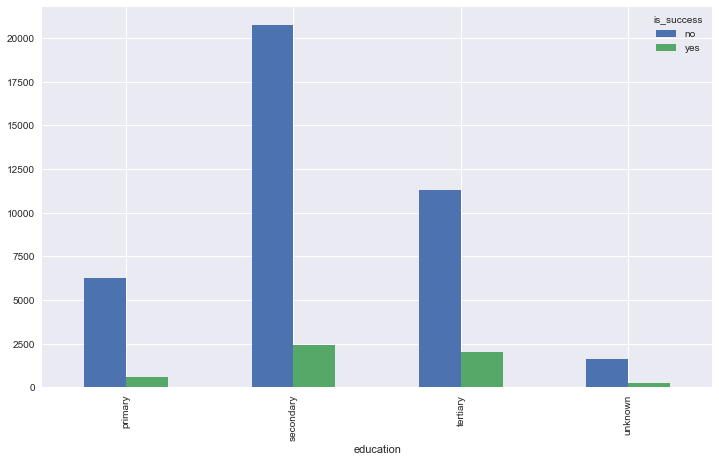

In [26]:
#education
education = pd.crosstab(df['education'], df['is_success'])
education.plot(kind='bar')
print(df.groupby(['education']).size()/len(df)*100)

In [27]:
#Fixing education column
df_new = impute_unknowns(df=df_new, column='education')

default
no     98.197341
yes     1.802659
dtype: float64


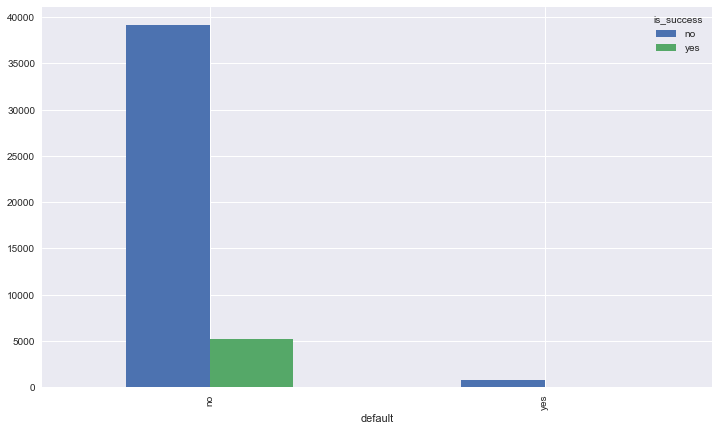

In [28]:
#default
default = pd.crosstab(df['default'], df['is_success'])
default.plot(kind='bar')
print(df.groupby(['default']).size()/len(df)*100)

In [29]:
#highly unbalanced hence drop this
df.drop(['default'], axis=1, inplace=True)

housing
no     44.416182
yes    55.583818
dtype: float64


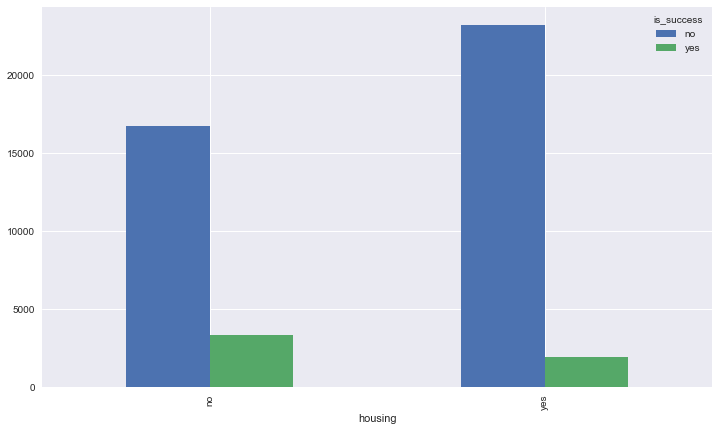

In [30]:
#housing
housing = pd.crosstab(df['housing'], df['is_success'])
housing.plot(kind='bar')
print(df.groupby(['housing']).size()/len(df)*100)

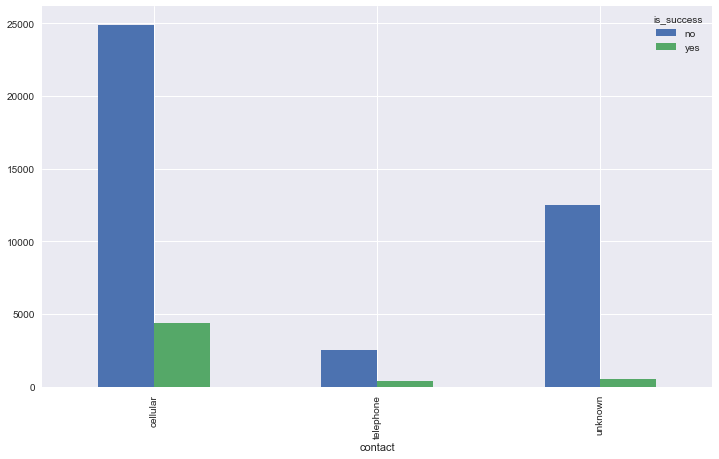

In [33]:
#contact
contact = pd.crosstab(df['contact'], df['is_success'])
contact.plot(kind='bar')
#print(df.groupby(["contact"])).size()/len(df)*100

In [ ]:
df.drop(['contact'], axis=1, inplace=True) #doesn't seem like an important feature

In [ ]:
#month
month = pd.crosstab(df['month'], df['is_success'])
month.plot(kind='bar')
print(df.groupby(['month']).size()/len(df)*100)

In [ ]:
#poutcome
poutcome = pd.crosstab(df['poutcome'], df['is_success'])
poutcome.plot(kind='bar')
df.groupby(['poutcome']).size()/len(df)*100

In [ ]:
df.drop(['poutcome'], axis=1, inplace=True) #most of the values of this column is missing

In [ ]:
#Loan
loan = pd.crosstab(df['loan'], df['is_success'])
loan.plot(kind='bar')
print(df.groupby(['loan']).size()/len(df)*100)

In [ ]:
#Updated dataset
df_new.info()

## Feature Engineering

In [ ]:
#separating target variable from the dataset before creating dummy variable
y = df_new['is_success']
X = df_new[df_new.columns[0:12]]
print(X.head())

In [ ]:
#creating dummy variables
X_dummy = pd.get_dummies(X)
print(X_dummy.head())

In [ ]:
X = np.array(X_dummy.values)
Y = np.array(y.values)

In [ ]:
X.shape, y.shape

In [ ]:
#splitting the validation dataset
size = 0.20
seed = 7
X_train, X_validation, y_train, Y_validation = model_selection.train_test_split(X, y, test_size=size, random_state = seed)

In [ ]:
#scaling the values
X_t = scale(X_train)

#let's use all of our variables as components i.e. 39
pca = PCA(n_components=39)

pca.fit(X_t)

#Amount of variance by each principal component
var = pca.explained_variance_ratio_

#cumulative variance
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [ ]:
#let's plot the cumilative variance
plt.plot(cum_var)

### From the plot we can see that first 32 components are explaining 100% variability of data. Let's proceed with these 32 components

In [ ]:
pca = PCA(n_components=32)
pca.fit(X_t)
X_train_PC = pca.fit_transform(X_t)

## Let's train our models

In [ ]:
#Test options
seed = 7
scoring = 'accuracy'

In [ ]:
#Algorithms
models=[]
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
#evaluating each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X_train_PC, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

### "SVM" has highest Accuracy but is slowest while "Logistic Regression" is almost as accurate but faster.

In [ ]:
#Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Wars')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

### Logistic Regression is the best model considering accuracy and speed.

# Let's Predict

In [ ]:
X_val = scale(X_validation)

pca.fit(X_val)
X_validation_PC = pca.fit_transform(X_val)

In [ ]:
#Maing Predictions
lr = LogisticRegression()
lr.fit(X_train_PC, y_train)
predictions = lr.predict(X_validation_PC)
print("Accuracy: ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))